# Lesson 2 Assignment - Data Exploration II - Jitter Head Count
## Author - Tyler Crosse
### Problem Statement:
A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

Now that we have studied different plot types and their usefulness in determining what is available in the data. Use the Jitter Head Count data set to find and report on interesting relationships in the data.

### Jittered Head Count information:
- GameCode: 2 digit game code. 
- BA: Baccarat
- C4: Blackjack variant
- CR: Craps
- DH: Blackjack variant
- FP: Four Card Poker
- LI: Let it Ride
- MI: Omaha Hi-Low
- MQ:  Blackjack variant
- MR: Mini-Baccarat
- MS: Mississippi Stud
- ND: Blackjack variant
- PA: Pai Gow Tiles
- PG: Pai Gow
- RO: Roulette
- RR: Electronic Roulette
- S6: Big Six
- SH: Blackjack variant
- TH: Blackjack variant
- TL: Blackjack variant
- TP: Texas Hold'em Poker
- UT: Ultimate Texas Hold'em
- WR: Casino War
- DateFormat: Date
- Hour: 0-23 of the day
- TabelsOcc:  Number of Tables Occupied in the casino
- TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.
- Tables Closed: Number of tables closed in the casino.
- HeadCount: Total Count of people at the hour, day, and table type
- DayOfWeek: 1-7.  1 = Sunday, 7 = Saturday.
- DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.

### Instructions
Using the Jitter Head Count data set, create a new notebook or use Studentname-M01-Vizualization.ipynb to find and report on interesting relationships in the data as follows:
- Create different complementary views of data by applying multiple chart types and aesthetics.
- Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

## Setup

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv"
jittered = pd.read_csv(url)

## Initial Exploration

In [18]:
# take a quick look at the data
jittered.head(10)

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47
5,BA,9/16/2011,11,0,1,0,0,6,47
6,BA,9/16/2011,12,0,1,0,0,6,47
7,BA,9/16/2011,13,0,1,0,0,6,47
8,BA,9/16/2011,14,0,1,0,0,6,47
9,BA,9/16/2011,15,0,1,0,0,6,47


In [17]:
# check for null values
jittered.isnull().values.any()

False

In [6]:
# start to examine categorical data
jittered['GameCode'].value_counts()

UT    8778
MQ    8778
DH    8778
TP    8778
WR    8778
FP    8778
RO    8778
TL    8778
S6    8778
PA    8778
TH    8778
PG    8778
MR    8778
RR    8778
ND    8778
C4    8778
CR    8778
SH    8778
LI    8778
MI    8630
MS     147
BA     118
Name: GameCode, dtype: int64

/Users/tcrosse/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 20.80000000000002, 'Day of the Week')

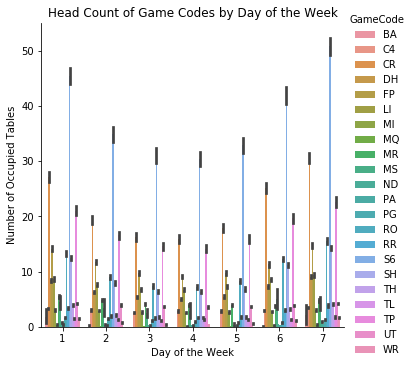

In [3]:
# fig = plt.figure(figsize=(10,10)) # Define plot area
# ax = fig.gca() # Define axis 
sns.catplot(x="DayOfWeek", y="HeadCount", hue="GameCode", kind="bar", data=jittered);
plt.title('Head Count of Game Codes by Day of the Week');
plt.ylabel('Number of Occupied Tables')
plt.xlabel('Day of the Week')

Text(0.5, 20.80000000000002, 'Day of the Week')

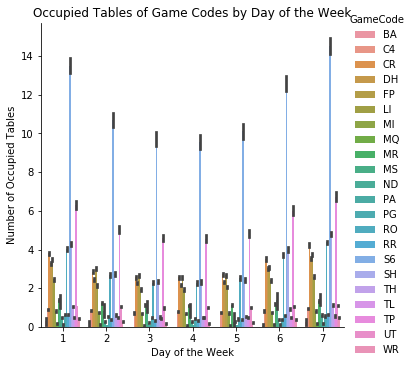

In [4]:
sns.catplot(x="DayOfWeek", y="TablesOcc", hue="GameCode", kind="bar", data=jittered);
plt.title('Occupied Tables of Game Codes by Day of the Week');
plt.ylabel('Number of Occupied Tables')
plt.xlabel('Day of the Week')

In [44]:
jittered['HeadPerTable'] = jittered['TablesOcc'] / jittered['HeadCount']

Text(0.5, 20.80000000000002, 'Day of the Week')

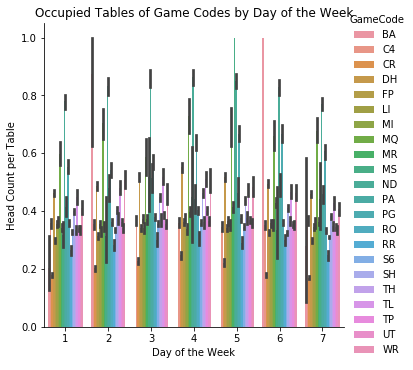

In [45]:
sns.catplot(x="DayOfWeek", y="HeadPerTable", hue="GameCode", kind="bar", data=jittered);
plt.title('Occupied Tables of Game Codes by Day of the Week');
plt.ylabel('Head Count per Table')
plt.xlabel('Day of the Week')

### Category plot observations
- It looks like the most popular games are CR, DH, S6, SH, TL, and TP - or Craps, BlackJack Variants, Big Six, and Texas Hold'em Poker
- The head coutn for all of the games seems to be highest on Friday, Saturday, Sunday and lowest Tuesday, Wednesday, Thursday
- It appears like Saturday is the busiest day and Wednesday is the least busy

In [7]:
jittered.columns

Index(['GameCode', 'DateFormat', 'Hour', 'TablesOcc', 'TablesOpen',
       'TablesClosed', 'HeadCount', 'DayOfWeek', 'DayNumber'],
      dtype='object')

In [8]:
jittered.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [13]:
jittered.loc[:, 'DateFormat'] = pd.to_datetime(jittered.loc[:, 'DateFormat'])
jittered.set_index('DateFormat', inplace=True)
jittered.dtypes

GameCode        object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

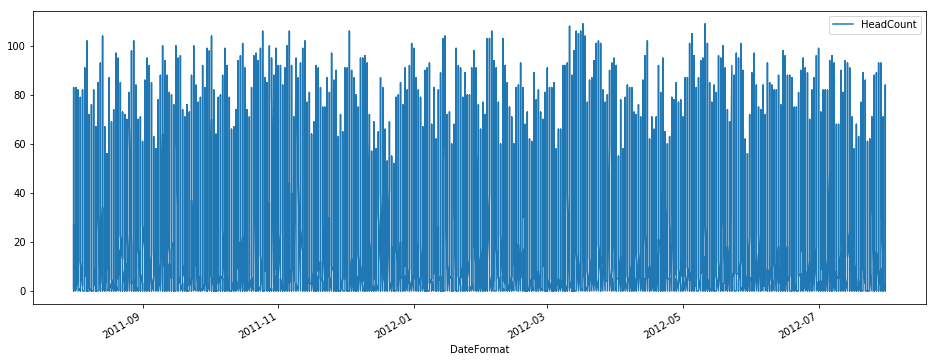

In [21]:
ax = plt.figure(figsize=(16, 6)).gca()
jittered[['HeadCount']].plot(ax=ax)

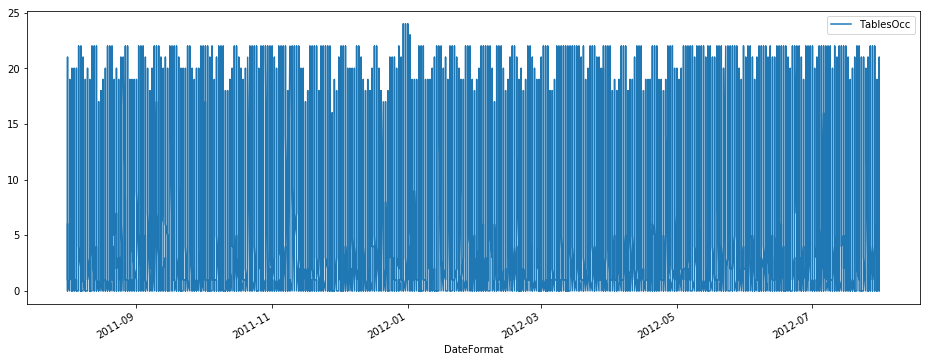

In [27]:
ax = plt.figure(figsize=(16, 6)).gca()
jittered[['TablesOcc']].plot(ax=ax)

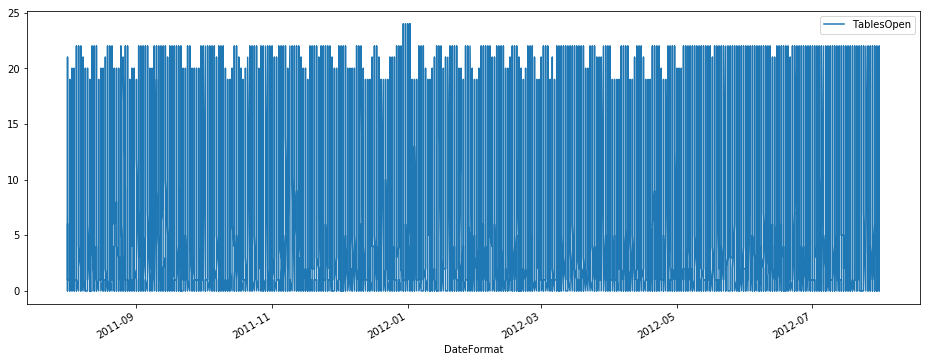

In [26]:

ax = plt.figure(figsize=(16, 6)).gca()
jittered[['TablesOpen']].plot(ax=ax)